In [1]:
import pandas as pd
import numpy as np
### make X and y
X = pd.DataFrame({'age': [25, 32, 47, 51, 62],
                  'height': [182, 176, 174, 168, 181],
                  'weight': [75, 71, 78, 72, 86]})
y = pd.Series([20, 32, 45, 55, 61], name = 'income')




In [2]:
y

0    20
1    32
2    45
3    55
4    61
Name: income, dtype: int64

In [21]:
z=pd.DataFrame(columns=['A','B'])
z['C']=5
z

,A,B,C


In [22]:
#### import numpy as np
### make X_shadow by randomly permuting each column of X
np.random.seed(42)
X_shadow = X.apply(np.random.permutation)
X_shadow.columns = ['shadow_' + feat for feat in X.columns]
### make X_boruta by appending X_shadow to X
X_boruta = pd.concat([X, X_shadow], axis = 1)

In [23]:
from sklearn.ensemble import RandomForestRegressor
### fit a random forest (suggested max_depth between 3 and 7)
forest = RandomForestRegressor(max_depth = 5, random_state = 42)
forest.fit(X_boruta, y)
### store feature importances
feat_imp_X = forest.feature_importances_[:len(X.columns)]
feat_imp_shadow = forest.feature_importances_[len(X.columns):]
### compute hits
hits = feat_imp_X > feat_imp_shadow.max()


In [24]:
# for i,name in enumerate(X.columns):
#     if hits[i]:
#         print(f"{str(name)}")

In [25]:
### initialize hits counter
hits = np.zeros((len(X.columns)))
### repeat 20 times
for iter_ in range(20):
   ### make X_shadow by randomly permuting each column of X
   np.random.seed(iter_)
   X_shadow = X.apply(np.random.permutation)
   X_boruta = pd.concat([X, X_shadow], axis = 1)
   ### fit a random forest (suggested max_depth between 3 and 7)
   forest = RandomForestRegressor(max_depth = 5, random_state = 42)
   forest.fit(X_boruta, y)
   ### store feature importance
   feat_imp_X = forest.feature_importances_[:len(X.columns)]
   feat_imp_shadow = forest.feature_importances_[len(X.columns):]
   ### compute hits for this trial and add to counter
   hits += (feat_imp_X > feat_imp_shadow.max())

In [26]:
hits

array([18.,  5.,  0.])

In [27]:
import scipy as sp
trials = 20
pmf = [sp.stats.binom.pmf(x, trials, .5) for x in range(trials + 1)]

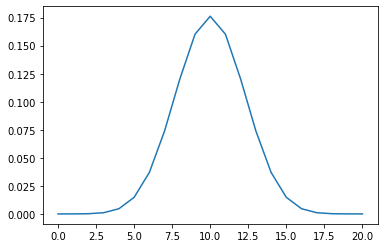

In [28]:
import matplotlib.pyplot as plt
plt.plot(pmf)

In [3]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np
###initialize Boruta
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), np.array(y))
### print results
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations